In [1]:
G = {'A':['B','C','D'],
     'B':['A','E','F'],
     'C':['A'],
     'D':['A'],
     'E':['B','F'],
     'F':['B','E']}
def parcours_en_largeur_dabord(G,s):
    noir = []
    file = []
    liste = []
    noir.append(s)
    file.append(s)
    while len(file)>0:
        u = file.pop(0)
        liste.append(u)
        for v in G[u]:
            if v not in noir:
                noir.append(v)
                file.append(v)
    return liste
print(parcours_en_largeur_dabord(G,'A'))



G = {'A':['B','C'],
     'B':['A'],
     'C':['A','D'],
     'D':['C']}
def parcours_en_profondeur_dabord(G,s):
    noir = []
    pile = []
    liste = []
    noir.append(s)
    pile.append(s)
    while len(pile)>0:
        u = pile.pop()
        liste.append(u)
        for v in G[u]:
            if v not in noir:
                noir.append(v)
                pile.append(v)
    return liste
print(parcours_en_profondeur_dabord(G,'A'))

['A', 'B', 'C', 'D', 'E', 'F']
['A', 'C', 'D', 'B']


In [115]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G_ = {'A':['B','C','D'],
     'B':['A','E','F'],
     'C':['A'],
     'D':['A'],
     'E':['B','F'],
     'F':['B','E']}
G__ = {'A':0,
     'B':1,
     'C':2,
     'D':3,
     'E':4,
     'F':5}
G = nx.Graph()
# definition des noeuds
node_list = []
for n in G_:
    node_list.append((G__[n],{"label":n,"col":"lightblue"}))
    
G.add_nodes_from(node_list)
# G.add_node(0,label='A',col='pink')

# definition des aretes
edge_list = []
for n in G_:
    edge_list+=[(G__[n],G__[a],{"color":"pink","styl":'solid'}) for a in G_[n]]
G.add_edges_from(edge_list)
# G.add_edge(0,1,weight=6,styl='dashed')

print(edge_list)

[(0, 1, {'color': 'pink', 'styl': 'solid'}), (0, 2, {'color': 'pink', 'styl': 'solid'}), (0, 3, {'color': 'pink', 'styl': 'solid'}), (1, 0, {'color': 'pink', 'styl': 'solid'}), (1, 4, {'color': 'pink', 'styl': 'solid'}), (1, 5, {'color': 'pink', 'styl': 'solid'}), (2, 0, {'color': 'pink', 'styl': 'solid'}), (3, 0, {'color': 'pink', 'styl': 'solid'}), (4, 1, {'color': 'pink', 'styl': 'solid'}), (4, 5, {'color': 'pink', 'styl': 'solid'}), (5, 1, {'color': 'pink', 'styl': 'solid'}), (5, 4, {'color': 'pink', 'styl': 'solid'})]


In [116]:
liste = list(G.nodes(data='col'))
colorNodes = {}
for noeud in liste:
    colorNodes[noeud[0]]=noeud[1]
colorNodes

{0: 'lightblue',
 1: 'lightblue',
 2: 'lightblue',
 3: 'lightblue',
 4: 'lightblue',
 5: 'lightblue'}

In [117]:
colorList=[colorNodes[node] for node in colorNodes]
colorList

['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']

In [118]:
liste = list(G.nodes(data='label'))
labels_nodes = {}
for noeud in liste:
    labels_nodes[noeud[0]]=noeud[1]
print(labels_nodes)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F'}


In [119]:
# labels_edges = {edge:G.edges[edge]['weight'] for edge in G.edges}
labels_edges = {edge:'' for edge in G.edges}
labels_edges

{(0, 1): '', (0, 2): '', (0, 3): '', (1, 4): '', (1, 5): '', (4, 5): ''}

In [120]:
liste = list(G.edges(data='styl'))
edges_style = {}
edges_style = {edge:G.edges[edge]['styl'] for edge in G.edges}
edges_style

{(0, 1): 'solid',
 (0, 2): 'solid',
 (0, 3): 'solid',
 (1, 4): 'solid',
 (1, 5): 'solid',
 (4, 5): 'solid'}

In [121]:
edg_style = [edges_style[node] for node in edges_style]
edg_style

['solid', 'solid', 'solid', 'solid', 'solid', 'solid']

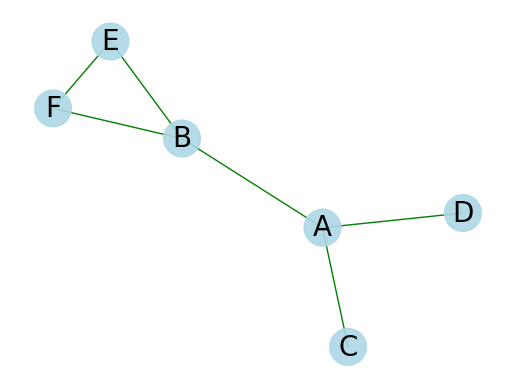

In [126]:
# positions for all nodes
pos = nx.spring_layout(G)  
 
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700,node_color=colorList,alpha=0.9)
               
# labels
nx.draw_networkx_labels(G, pos, labels=labels_nodes,font_size=20, font_color='black', font_family='sans-serif')

# edges
nx.draw_networkx_edges(G, pos,width=1, edge_color='green')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_edges,  font_color='red')


plt.axis('off')
plt.savefig('fig1.png')
plt.show()

In [123]:
print(G.edges)

[(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (4, 5)]


In [21]:
# nb de noeuds
print("nb de noeuds",len(G.nodes))
# nb d'arètes
print("nb d'arètes",len(G.edges))
MA = np.array([[0 for _ in range(len(G.nodes))] for _ in range(len(G.nodes))])
print(MA)
print(G.edges)
for e in G.edges:
    MA[e[0],e[1]] = 1
    MA[e[1], e[0]] = 1
print(MA)

# Parcours en largeur d'abord

def parcours_largeur_dabord(G:nx.Graph, noeud_origine:int):
    file = []
    graphe = ["blanc" for i in range(len(G.nodes))]
    graphe[noeud_origine] = "noir"
    file.append(noeud_origine)
    while len(file) >0:
        noeud_courant = file.pop(0)
        print(G.nodes(data='label')[noeud_courant])
        n_a = [y for [x,y] in G.edges if x == noeud_courant]
        for noeud_adjacent in n_a:
            if graphe[noeud_adjacent] != "noir":
                graphe[noeud_adjacent] = "noir"
                file.append(noeud_adjacent)


parcours_largeur_dabord(G, 0)

nb de noeuds 6
nb d'arètes 7
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (1, 5), (4, 5)]
[[0 1 1 1 0 0]
 [1 0 0 1 1 1]
 [1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [0 1 0 0 0 1]
 [0 1 0 0 1 0]]
A
B
C
D
E
F
